In [ ]:
'''
【课程1.4】  统计分析

统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析

集中趋势度量 / 离中趋势度量

'''

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# 1、集中趋势度量
# 指一组数据向某一中心靠拢的倾向，核心在于寻找数据的代表值或中心值 —— 统计平均数
# 算数平均数、位置平均数
# （1）算数平均数

data = pd.DataFrame({'value':np.random.randint(100,120,100),
                    'f':np.random.rand(100)})
data['f'] = data['f'] / data['f'].sum()  # f为权重，这里将f列设置成总和为1的权重占比
print(data.head())
print('------')
# 创建数据

mean = data['value'].mean()
print('简单算数平均值为：%.2f' % mean)
# 简单算数平均值 = 总和 / 样本数量 （不涉及权重）

mean_w = (data['value'] * data['f']).sum() / data['f'].sum()
print('加权算数平均值为：%.2f' % mean_w)
# 加权算数平均值 = (x1f1 + x2f2 + ... + xnfn) / (f1 + f2 + ... + fn)

   value         f
0    108  0.012491
1    111  0.001104
2    110  0.017312
3    105  0.009668
4    113  0.012638
------
简单算数平均值为：109.07
加权算数平均值为：108.73


众数为 [102]
中位数为110


AttributeError: Unknown property hold

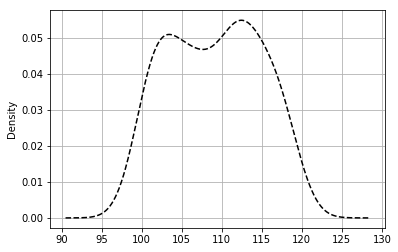

In [11]:
# 1、集中趋势度量
# （2）位置平均数

m = data['value'].mode()
print('众数为',m.tolist())
# 众数是一组数据中出现次数最多的数，这里可能返回多个值

med = data['value'].median()
print('中位数为%i' % med)
# 中位数指将总体各单位标志按照大小顺序排列后，中间位置的数字

data['value'].plot(kind = 'kde',style = '--k',grid = True)
# 密度曲线

plt.axvline(mean,hold=None,color='r',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.005,'简单算数平均值为：%.2f' % mean, color = 'r')
# 简单算数平均值

plt.axvline(mean_w,hold=None,color='b',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.01,'加权算数平均值：%.2f' % mean_w, color = 'b')
# 加权算数平均值

plt.axvline(med,hold=None,color='g',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.015,'中位数：%i' % med, color = 'g')
# 中位数
# **这里三个数text显示的横坐标一致，目的是图示效果不拥挤

In [4]:
# 2、离中趋势度量
# 指一组数据中各数据以不同程度的距离偏离中心的趋势
# 极差与分位差、方差与标准差、离散系数

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据
# A/B销售额量级在同一水平

                A_sale      B_sale
2017-06-01  943.361458  889.809383
2017-06-02  325.729943  535.075724
2017-06-03   64.438406  180.295287
2017-06-04  228.232195  501.818070
2017-06-05   90.017279  827.655198
------


                A_sale      B_sale
2017-06-01  680.931563  725.699084
2017-06-02  901.547394  260.066906
2017-06-03  141.824890  771.556011
2017-06-04   68.673118  803.349822
2017-06-05  341.532044  468.435069
------
A销售额的极差为：892.64, B销售额的极差为：932.88
------
A销售额的分位差为：319.34, B销售额的分位差为：474.34
------


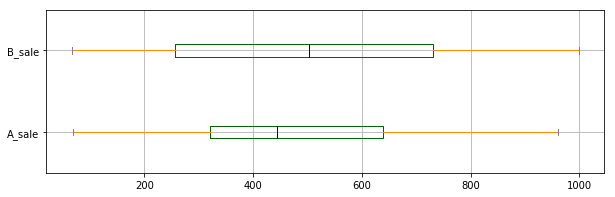

In [5]:
# 2、离中趋势度量
# （1）极差、分位差

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------')
# 创建数据
# A/B销售额量级在同一水平

a_r = data['A_sale'].max() - data['A_sale'].min()
b_r = data['B_sale'].max() - data['B_sale'].min()
print('A销售额的极差为：%.2f, B销售额的极差为：%.2f' % (a_r,b_r))
print('------')
# 极差
# 没有考虑中间变量的变动，测定离中趋势不稳定

sta = data['A_sale'].describe()
stb = data['B_sale'].describe()
#print(sta)
a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print('A销售额的分位差为：%.2f, B销售额的分位差为：%.2f' % (a_iqr,b_iqr))
print('------')
# 分位差

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False,grid = True,color = color,figsize = (10,3))
# 箱型图

A销售额的标准差为：265.55, B销售额的标准差为：276.23
A销售额的方差为：70519.30, B销售额的方差为：76303.02


AttributeError: Unknown property hold

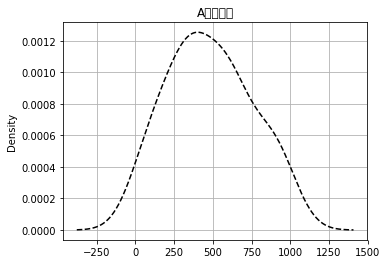

In [6]:
# 2、离中趋势度量
# （2）方差与标准差

a_std = sta.loc['std']
b_std = stb.loc['std']
a_var = data['A_sale'].var()
b_var = data['B_sale'].var()
print('A销售额的标准差为：%.2f, B销售额的标准差为：%.2f' % (a_std,b_std))
print('A销售额的方差为：%.2f, B销售额的方差为：%.2f' % (a_var,b_var))
# 方差 → 各组中数值与算数平均数离差平方的算术平均数
# 标准差 → 方差的平方根
# 标准差是最常用的离中趋势指标 → 标准差越大，离中趋势越明显

fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
data['A_sale'].plot(kind = 'kde',style = 'k--',grid = True,title = 'A密度曲线')
plt.axvline(sta.loc['50%'],hold=None,color='r',linestyle="--",alpha=0.8)  
plt.axvline(sta.loc['50%'] - a_std,hold=None,color='b',linestyle="--",alpha=0.8)  
plt.axvline(sta.loc['50%'] + a_std,hold=None,color='b',linestyle="--",alpha=0.8)  
# A密度曲线，1个标准差

ax2 = fig.add_subplot(1,2,2)
data['B_sale'].plot(kind = 'kde',style = 'k--',grid = True,title = 'B密度曲线')
plt.axvline(stb.loc['50%'],hold=None,color='r',linestyle="--",alpha=0.8)  
plt.axvline(stb.loc['50%'] - b_std,hold=None,color='b',linestyle="--",alpha=0.8)  
plt.axvline(stb.loc['50%'] + b_std,hold=None,color='b',linestyle="--",alpha=0.8)  
# B密度曲线，1个标准差